# **Kết nối Dr**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Thư Viện**

In [ ]:
import keras
from keras.models import Sequential
from glob import glob
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np
import matplotlib.pyplot as plt

# **LOAD MODEL**

In [ ]:
from keras.models import load_model
model = load_model('Hue.h5')

In [ ]:
dudoan = {0: 'NORMAL',
          1: 'PNEUMONIA'}

# **Loading Data**

In [ ]:
test_path="/content/drive/MyDrive/pneumonia_xray/test"
train_path="/content/drive/MyDrive/pneumonia_xray/train"
val_path="/content/drive/MyDrive/pneumonia_xray/val"

In [ ]:
import os
x1 =os.listdir( '/content/drive/MyDrive/pneumonia_xray/train/NORMAL')
x2 =os.listdir( '/content/drive/MyDrive/pneumonia_xray/train/PNEUMONIA')

Text(0.5, 1.0, 'Datasets')

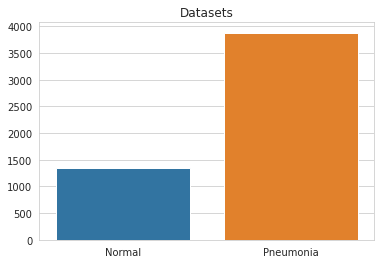

In [ ]:
sns.set_style('whitegrid')
sns.barplot(x=['Normal','Pneumonia'],y=[len(x1),len(x2)])
plt.title('Datasets')

# **Model Create**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                        rotation_range=0.2, #xoay hình
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(64, 64),
                                                 batch_size=10,
                                                 class_mode='categorical')



test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(64, 64),
                                            batch_size=10,
                                            class_mode='categorical')



val_set = train_datagen.flow_from_directory(val_path,
                                            target_size=(64, 64),
                                            batch_size=10,
                                            shuffle=True,
                                            class_mode='categorical')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(8, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Activation("relu"))
model.add(Dense(1024))
model.add(Dropout(0.4))
model.add(Dense(2))
model.add(Activation("softmax"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 16)         0

In [ ]:
history = model.fit_generator(train_set,
                    steps_per_epoch=3800//10,
                    epochs=100,
                    validation_data=test_set,
                    validation_steps=2200//10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
380/380 [==============================] - 2178s 6s/step - loss: 0.4660 - accuracy: 0.7853 - val_loss: 0.4600 - val_accuracy: 0.7949
Epoch 2/100
380/380 [==============================] - 541s 1s/step - loss: 0.3313 - accuracy: 0.8611
Epoch 3/100
380/380 [==============================] - 199s 523ms/step - loss: 0.3228 - accuracy: 0.8676
Epoch 4/100
380/380 [==============================] - 120s 315ms/step - loss: 0.3009 - accuracy: 0.8713
Epoch 5/100
380/380 [==============================] - 98s 258ms/step - loss: 0.2978 - accuracy: 0.8721
Epoch 6/100
380/380 [==============================] - 90s 237ms/step - loss: 0.2693 - accuracy: 0.8832
Epoch 7/100
380/380 [==============================] - 93s 245ms/step - loss: 0.2878 - accuracy: 0.8768
Epoch 8/100
380/380 [==============================] - 88s 232ms/step - loss: 0.2657 - accuracy: 0.8855
Epoch 9/100
380/380 [==============================] - 89s 233ms/step - loss: 0.2631 - accuracy: 0.8887
Epoch 10/100
380/380 [=

In [ ]:
model.save('Hue.h5')

In [ ]:
plt.plot(history.history["loss"], label ="Train loss")
plt.show()
plt.plot(history.history["accuracy"], label ="Accuracy")
plt.show()

In [ ]:
predictions = model.predict_generator(val_set, steps=16, verbose=1)

In [ ]:
predictions.shape

(16, 2)

In [ ]:
print(test_set.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
img = load_img("/content/drive/MyDrive/pneumonia_xray/test/NORMAL/IM-0003-0001.jpeg",target_size=(64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print("Accuracy: ",a, '%')


99.99572038650513 %


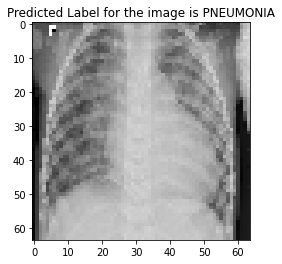

In [ ]:
img = load_img('/content/drive/MyDrive/pneumonia_xray/test/PNEUMONIA/person143_bacteria_688.jpeg',target_size=(64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')